In [105]:
# Importando bibliotecas e base de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

jogo = pd.read_csv("Projeto_SAS_Cartola_v3.csv", encoding='latin-1', sep=';')
# jogo

In [103]:
# Trocando vírgula por ponto para análise do algoritmo
# jogo['time_media_gol'] = jogo['time_media_gol'].str.replace(',','.').astype(np.float64)
# jogo['time_media_lat'] = jogo['time_media_lat'].str.replace(',','.').astype(np.float64)
# jogo['time_media_zag'] = jogo['time_media_zag'].str.replace(',','.').astype(np.float64)
# jogo['time_media_mei'] = jogo['time_media_mei'].str.replace(',','.').astype(np.float64)
# jogo['time_media_ata'] = jogo['time_media_ata'].str.replace(',','.').astype(np.float64)
# jogo['time_adversario_media_gol'] = jogo['time_adversario_media_gol'].str.replace(',','.').astype(np.float64)
# jogo['time_adversario_media_lat'] = jogo['time_adversario_media_lat'].str.replace(',','.').astype(np.float64)
# jogo['time_adversario_media_zag'] = jogo['time_adversario_media_zag'].str.replace(',','.').astype(np.float64)
# jogo['time_adversario_media_mei'] = jogo['time_adversario_media_mei'].str.replace(',','.').astype(np.float64)
# jogo['time_adversario_media_ata'] = jogo['time_adversario_media_ata'].str.replace(',','.').astype(np.float64)
# jogo

In [106]:
# Trocando valores nulos por 0.0 e excluindo linhas com valores nulos (não existirá, somente para certeza)
jogo = jogo.fillna(0)
jogo = jogo[jogo.notna()]
# jogo

,time_id,Time,time_posicao,time_mando_campo,time_Rodada,time_rodada_anterior,time_resultado_anterior,time_mando_campo_anterior,time_gols,time_PTS,...,time_adversario_preco_medio_zag,time_adversario_preco_medio_mei,time_adversario_preco_medio_ata,time_adversario_preco_medio_tec,time_adversario_media_gol,time_adversario_media_lat,time_adversario_media_zag,time_adversario_media_mei,time_adversario_media_ata,time_adversario_media_tec
0,275,Palmeiras,14,1,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
1,286,Juventude,8,1,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
2,294,Coritiba,2,1,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
3,327,América-MG,16,2,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
4,263,Botafogo,10,2,2,1,3.0,1.0,1.0,0.0,...,"4,333333333333333","5,5555555555555554","7,5999999999999996",8.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,280,Bragantino,9,1,24,23,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
476,286,Juventude,20,1,24,23,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
477,356,Fortaleza,15,1,24,23,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0
478,373,Atlético-GO,19,1,24,23,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0,0,0,0,0,0.0


In [ ]:
# Coeficiente de Pearson
lista = []
for i in jogo:
    if jogo[i].dtypes != 'object':
        lista.append(i)

for i in lista:
    print(i)
    x = stats.pearsonr(jogo['time_resultado_anterior'], jogo[i])
    print(x)


In [ ]:
# Colunas do DataSet
jogo.info()

In [ ]:
# Analisando estrutura do DataSet
flamengo = jogo.loc[jogo['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
flamengo

In [ ]:
# Analisando linha com ID 47
flamengo.loc[363]
# flamengo.loc[274]

In [108]:
# Gerando dataSet de treino
dataSetTreino = jogo.loc[jogo['time_Rodada'] < 20]
# dataSetTreino


In [109]:
# Gerando DataSet de teste
dataSetTeste = jogo.loc[jogo['time_Rodada'] >= 19]
# dataSetTeste

In [ ]:
# Analisando estrutura do DataSet de treino
flamengo = dataSetTreino.loc[dataSetTreino['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
# flamengo

Treino do Modelo com variáveis do DataSet reduzidas

In [110]:
# Setando variáveis que impactam na variável dependente (REDUZIDA)
x = jogo[[
        'time_posicao', 
        'time_mando_campo',
        'time_gols',
        'time_PTS', 
        'time_JG', 
        'time_E', 
        'time_D',
        'time_GP', 
        'time_GC', 
        'time_SG',  
        'time_adversario_Posicao', 
        'time_adversario_gols',
        'time_adversario_PTS', 
        'time_adversario_JG', 
        'time_adversario_E', 
        'time_adversario_D', 
        'time_adversario_GP', 
        'time_adversario_GC', 
        'time_adversario_SG'
    ]]
y = jogo['time_resultado_anterior']

# Treinando o modelo
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.15, random_state=0)

In [111]:
# Realizando predições 
logi_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
logi_reg.fit(x_treino, y_treino)
y_pred = logi_reg.predict(x_teste)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

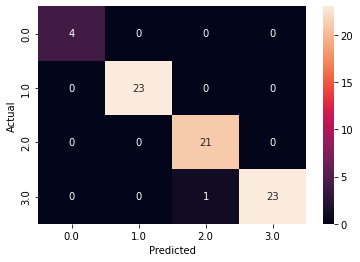

In [112]:
# Matriz de confusão do modelo
matriz_confusao = pd.crosstab(y_teste, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_confusao, annot=True)

In [113]:
print('Acurácia: ',metrics.accuracy_score(y_teste, y_pred))
plt.show()

Acurácia:  0.9861111111111112


In [114]:
# Função que verifica possível resultado em cada rodada (20 à 24) dos jogos.
def verificarResultado(rodada, rodadaAtual):
    x = 0
    for i,j in rodada.iterrows():
        # Mandante
        atualMandante = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        atualMandante = atualMandante.loc[atualMandante['time_Rodada'] == rodadaAtual]

        # # Visitante
        atualVisitante = jogo.loc[jogo['Time'].str.strip() == j['time_adversario']]
        atualVisitante = atualVisitante.loc[atualVisitante['time_Rodada'] == rodadaAtual]
        
        # Rodada Futura
        rodadaFutura = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        rodadaFutura = rodadaFutura.loc[rodadaFutura['time_rodada_anterior'] == rodadaAtual]

        teste = {
            'time_posicao': atualMandante['time_posicao'].values, 
            'time_mando_campo': atualMandante['time_mando_campo'].values, 
            'time_gols': atualMandante['time_gols'].values, 
            'time_PTS': atualMandante['time_PTS'].values, 
            'time_JG': atualMandante['time_JG'].values, 
            'time_E': atualMandante['time_E'].values, 
            'time_D': atualMandante['time_D'].values,
            'time_GP': atualMandante['time_GP'].values, 
            'time_GC': atualMandante['time_GC'].values, 
            'time_SG': atualMandante['time_SG'].values, 
            'time_adversario_Posicao': atualVisitante['time_posicao'].values, 
            'time_adversario_gols': atualVisitante['time_gols'].values, 
            'time_adversario_PTS': atualVisitante['time_PTS'].values, 
            'time_adversario_JG': atualVisitante['time_JG'].values, 
            'time_adversario_E': atualVisitante['time_E'].values, 
            'time_adversario_D': atualVisitante['time_D'].values, 
            'time_adversario_GP': atualVisitante['time_GP'].values, 
            'time_adversario_GC': atualVisitante['time_GC'].values, 
            'time_adversario_SG': atualVisitante['time_SG'].values
        }

        print("Jogo entre " + rodadaFutura['Time'].values + " e "+ rodadaFutura['time_adversario'].values)
        
        dft = pd.DataFrame(data=teste, index=[0])
        resultado = logi_reg.predict(dft)
        if resultado == 1:
            print(rodadaFutura['Time'].values + " ganha!")
        elif resultado == 2:
            print("Empate!")
        elif resultado == 3:
            print(rodadaFutura['time_adversario'].values + " ganha!")
        print()

# Filtrando a rodada para verificação dos resultados
print("Rodada 23:")
rodada = jogo.loc[jogo['time_rodada_anterior'] == 23]
rodada = rodada.loc[rodada['time_mando_campo'] == 1.0]
verificarResultado(rodada, 23)

Rodada 23:
['Jogo entre Fluminense e Coritiba']
['Fluminense ganha!']

['Jogo entre Athlético-PR e América-MG']
['América-MG ganha!']

['Jogo entre Palmeiras e Flamengo']
['Flamengo ganha!']

['Jogo entre Santos e São Paulo']
['São Paulo ganha!']

['Jogo entre Atlético-MG e Goiás']
Empate!

['Jogo entre Avaí e Internacional']
['Internacional ganha!']

['Jogo entre Bragantino e Ceará']
Empate!

['Jogo entre Juventude e Botafogo']
Empate!

['Jogo entre Fortaleza e Corinthians']
['Fortaleza ganha!']

['Jogo entre Atlético-GO e Cuiabá']
['Cuiabá ganha!']

